# Titanic

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 설치된 글꼴 찾기
from matplotlib import font_manager

for font in font_manager.fontManager.ttflist:
    if 'Nanum' in font.name:
        print(font.name, font.fname)

NanumGothic C:\Windows\Fonts\EXTRABOLD.TTF
NanumGothic C:\WINDOWS\Fonts\.TTF
NanumGothic C:\Windows\Fonts\BOLD.TTF
NanumGothic C:\WINDOWS\Fonts\NanumGothic.ttf
NanumGothic C:\WINDOWS\Fonts\BOLD.TTF
NanumGothic C:\Windows\Fonts\.TTF
NanumGothic C:\WINDOWS\Fonts\EXTRABOLD.TTF


In [3]:
# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
# - 기호 관련 경고 해결
plt.rcParams['axes.unicode_minus'] = False

In [4]:
df = pd.read_csv('../data/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
# 한글로 컬럼명 바꾸기
df.columns = ['id', '생존여부', '객실등급', '이름', '성별', '나이', '형제배우자수', '부모자식수', '티켓번호', '요금', '수하물번호', '선착장']
df

,id,생존여부,객실등급,이름,성별,나이,형제배우자수,부모자식수,티켓번호,요금,수하물번호,선착장
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 1. 데이터 살펴보기

In [6]:
df.shape

(891, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      891 non-null    int64  
 1   생존여부    891 non-null    int64  
 2   객실등급    891 non-null    int64  
 3   이름      891 non-null    object 
 4   성별      891 non-null    object 
 5   나이      714 non-null    float64
 6   형제배우자수  891 non-null    int64  
 7   부모자식수   891 non-null    int64  
 8   티켓번호    891 non-null    object 
 9   요금      891 non-null    float64
 10  수하물번호   204 non-null    object 
 11  선착장     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isnull().sum()

id          0
생존여부        0
객실등급        0
이름          0
성별          0
나이        177
형제배우자수      0
부모자식수       0
티켓번호        0
요금          0
수하물번호     687
선착장         2
dtype: int64

In [9]:
df.객실등급.value_counts()

3    491
1    216
2    184
Name: 객실등급, dtype: int64

In [10]:
df.선착장.value_counts()

S    644
C    168
Q     77
Name: 선착장, dtype: int64

In [11]:
df.drop(['id', '이름', '티켓번호', '수하물번호'], axis=1, inplace=True)
df

,생존여부,객실등급,성별,나이,형제배우자수,부모자식수,요금,선착장
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


## 2. 데이터 분석

### 1. 생존자 수 보기

In [12]:
df.생존여부.value_counts()

0    549
1    342
Name: 생존여부, dtype: int64

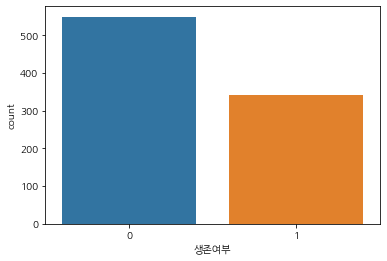

In [13]:
sns.countplot(x='생존여부', data=df)
plt.show()

### 2. 나이별로 데이터 분석

In [14]:
df['나이'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: 나이, dtype: float64

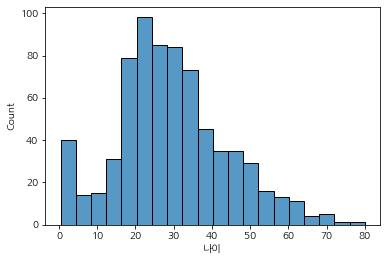

In [15]:
# 나이대별 분포도
sns.histplot(df.나이)
plt.show()

In [16]:
df.loc[df.나이 < 10, '생존여부'].count()

62

In [17]:
df.loc[df.나이 < 10, '생존여부'].sum()

38

In [18]:
survival_rate = []
for i in range(10, 91, 10):
    survival_rate.append(df.loc[(df.나이>=i-10) & (df.나이<i), '생존여부'].mean())
survival_rate

[0.6129032258064516,
 0.4019607843137255,
 0.35,
 0.437125748502994,
 0.38202247191011235,
 0.4166666666666667,
 0.3157894736842105,
 0.0,
 1.0]

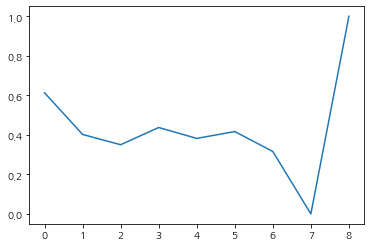

In [19]:
sns.lineplot(data=survival_rate)
plt.show()

### 3. 성별 데이터 분석

In [20]:
df.groupby('성별')['생존여부'].mean()

성별
female    0.742038
male      0.188908
Name: 생존여부, dtype: float64

In [21]:
df.groupby('성별')['생존여부'].sum()

성별
female    233
male      109
Name: 생존여부, dtype: int64

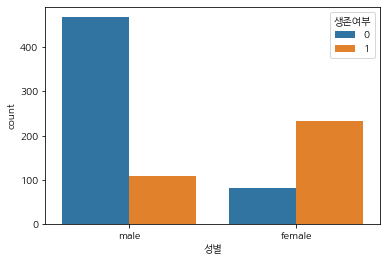

In [22]:
sns.countplot(x='성별', hue='생존여부', data=df)
plt.show()

In [23]:
# 성별 생존율
df.groupby('성별')['생존여부'].mean()

성별
female    0.742038
male      0.188908
Name: 생존여부, dtype: float64

### 4. 객실등급별 데이터 분석

In [24]:
df.객실등급.value_counts()

3    491
1    216
2    184
Name: 객실등급, dtype: int64

In [25]:
df.groupby('객실등급')['생존여부'].count()

객실등급
1    216
2    184
3    491
Name: 생존여부, dtype: int64

<AxesSubplot:xlabel='객실등급', ylabel='count'>

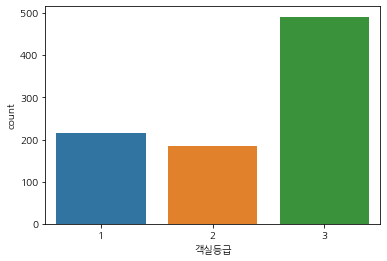

In [26]:
sns.countplot(x='객실등급', data=df)

In [27]:
df.groupby('객실등급')['생존여부'].sum()

객실등급
1    136
2     87
3    119
Name: 생존여부, dtype: int64

<AxesSubplot:xlabel='객실등급', ylabel='count'>

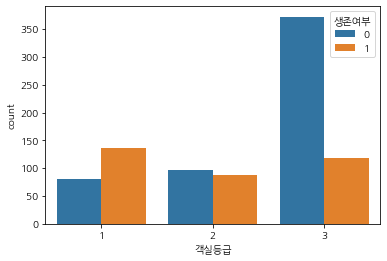

In [28]:
sns.countplot(x='객실등급', hue='생존여부', data=df)

### 5. 상관관계 분석

In [29]:
df.corr()

,생존여부,객실등급,나이,형제배우자수,부모자식수,요금
생존여부,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
객실등급,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
나이,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
형제배우자수,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
부모자식수,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
요금,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

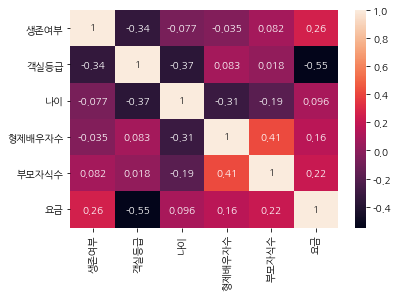

In [30]:
sns.heatmap(data=df.corr(), annot=True)